<div style="color:white;background-color:#1d1545;padding:3%;border-radius:50px 50px;font-size:1.4em;text-align:center">Regression Modeling for AI Index Dataset</div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> This notebook provides a detailed walkthrough of building and evaluating regression models to predict <b>total_score</b> from the <b>AI Index 2023</b> dataset. We explore multiple models, preprocess data, and visualize performance.</div>



<!-- Step 1 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 1: Import Required Libraries</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Import essential libraries for data handling, visualization, preprocessing, modeling, and evaluation.</div>


In [1]:
# Import libraries for data manipulation, modeling, preprocessing, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules for machine learning pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_9074/1558356968.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<!-- Step 2 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 2: Load and Preview the Dataset</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Load the AI Index dataset and preview a few records to understand the structure and values.</div>


In [2]:
df = pd.read_csv("/Users/sukanya/Downloads/Data Science Project/AI_index_db.csv")
df.head()  # Display the first five rows to get an overview of the data

,country,talent,infrastructure,operating_environment,research,development,government_strategy,commercial,total_score,region,cluster,income_group,political_regime
0,United States Of America,100.00,61.794655,64.56,100.00,12.931864,77.39,100.00,100.000000,Americas,Power Players,High,Liberal Democracy
1,China,16.51,100.000000,91.57,71.42,79.970000,94.87,44.02,62.920000,Asia-Pacific,Power Players,Upper Middle,Closed Autocracy
2,United Kingdom,39.65,71.430000,74.65,36.50,25.030000,82.82,18.91,40.930000,Europe,Traditional Champions,High,Liberal Democracy
3,Canada,31.28,77.050000,93.94,30.67,25.780000,100.00,14.88,24.173175,Americas,Traditional Champions,High,Liberal Democracy
4,Israel,35.76,67.580000,82.44,32.63,27.960000,43.91,27.33,24.173175,Middle East,Rising Stars,High,Liberal Democracy


<!-- Step 3 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 3: Define Features and Target</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Identify the input variables (features) and output variable (target) for modeling.</div>


In [3]:
target = "total_score"
numerical_features = ['talent', 'infrastructure', 'operating_environment', 
                      'research', 'development', 'government_strategy', 'commercial']
categorical_features = ['region', 'cluster', 'income_group', 'political_regime']

X = df[numerical_features + categorical_features]
y = df[target]  # This is our prediction target

<!-- Step 4 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 4: Preprocess the Data</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Prepare the data for machine learning by normalizing numerical values and encoding categorical variables.</div>


In [4]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine both preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

<!-- Step 5 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 5: Define Regression Models</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Set up multiple regression models to evaluate and compare performance.</div>


In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

<!-- Step 6 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 6: Train-Test Split</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Split the dataset into training and testing sets to evaluate model generalization.</div>

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

<!-- Step 7 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 7: Train and Evaluate Models</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Train each model, make predictions, and evaluate using common regression metrics.</div>



In [11]:
results = []
trained_models = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})
    trained_models[name] = pipe

# Create a DataFrame to rank and display the model metrics
results_df = pd.DataFrame(results).sort_values(by="RMSE")

from tabulate import tabulate
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════╤═════════╤══════════╤══════════╕
│ Model             │    RMSE │      MAE │       R2 │
╞═══════════════════╪═════════╪══════════╪══════════╡
│ Linear Regression │ 15.7027 │  8.93548 │ 0.742079 │
├───────────────────┼─────────┼──────────┼──────────┤
│ Neural Network    │ 17.5754 │  9.83127 │ 0.67689  │
├───────────────────┼─────────┼──────────┼──────────┤
│ Random Forest     │ 25.4267 │ 12.9096  │ 0.323732 │
├───────────────────┼─────────┼──────────┼──────────┤
│ Decision Tree     │ 27.4546 │ 13.7374  │ 0.211561 │
╘═══════════════════╧═════════╧══════════╧══════════╛


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged 

<!-- Step 8 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 8: Visualize Model Performance</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Compare model performance visually across RMSE, MAE, and R-squared metrics.</div>


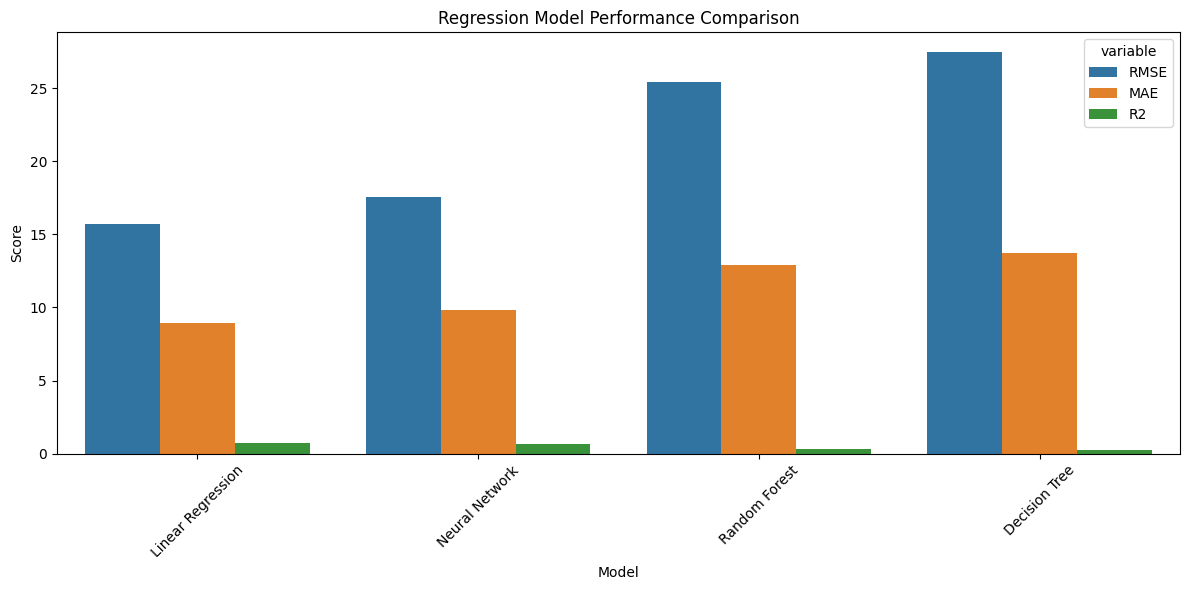

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["RMSE", "MAE", "R2"]),
            x="Model", y="value", hue="variable")
plt.title("Regression Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.tight_layout()
plt.show()

/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_9074/2217399617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="RMSE", y="Model", ax=axs[0], palette="viridis")
/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_9074/2217399617.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="MAE", y="Model", ax=axs[1], palette="magma")
/var/folders/_x/1j3rm6sd6cn3kd7qpmy3s_k40000gn/T/ipykernel_9074/2217399617.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="R2", y="Mode

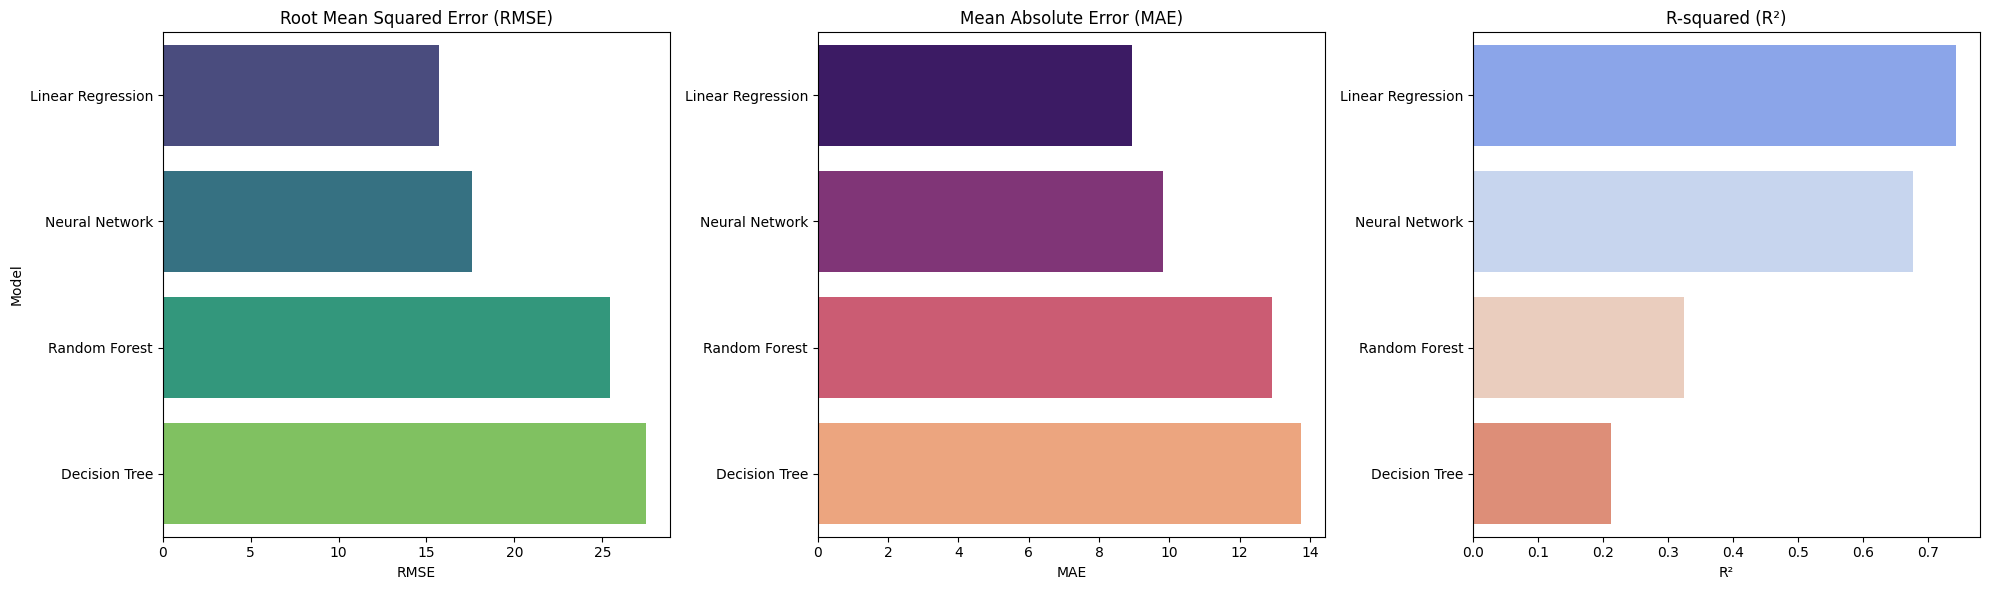

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(data=results_df, x="RMSE", y="Model", ax=axs[0], palette="viridis")
axs[0].set_title("Root Mean Squared Error (RMSE)")
axs[0].set_xlabel("RMSE")
axs[0].set_ylabel("Model")

sns.barplot(data=results_df, x="MAE", y="Model", ax=axs[1], palette="magma")
axs[1].set_title("Mean Absolute Error (MAE)")
axs[1].set_xlabel("MAE")
axs[1].set_ylabel("")

sns.barplot(data=results_df, x="R2", y="Model", ax=axs[2], palette="coolwarm")
axs[2].set_title("R-squared (R²)")
axs[2].set_xlabel("R²")
axs[2].set_ylabel("")

plt.tight_layout()
plt.show()

<!-- Step 9 Header Box -->
<div style="color:white;background-color:#4A90E2;padding:1.5%;border-radius:20px;font-size:1.3em;text-align:left"><b>Step 9: Test on New Sample Data</b></div>
<div class="alert alert-block alert-info"> 📌 <b>Purpose:</b> Use the best-trained model to make a prediction on new, unseen input data.</div>


In [10]:
best_model = trained_models["Linear Regression"]

new_input = pd.DataFrame([{
    "talent": 50,
    "infrastructure": 60,
    "operating_environment": 70,
    "research": 40,
    "development": 30,
    "government_strategy": 80,
    "commercial": 45,
    "region": "Europe",
    "cluster": "Rising Stars",
    "income_group": "High",
    "political_regime": "Liberal Democracy"
}])

predicted_score = best_model.predict(new_input)[0]
print(f"\u2705 Predicted total_score: {predicted_score:.2f}")

✅ Predicted total_score: 37.48
